<a href="https://colab.research.google.com/github/KShinyShamma/Activity_Recognition/blob/main/Classification_Pose.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

# Load training and testing data
train_data = pd.read_csv('/content/drive/MyDrive/P2/DATA/activity_Trainkeypoints_02.csv')
test_data = pd.read_csv('/content/drive/MyDrive/P2/DATA/activity_Testkeypoints_02.csv')

X_train = train_data.drop(['image_name', 'activity'], axis=1)
y_train = train_data['activity'].astype('category').cat.codes
X_test = test_data.drop(['image_name', 'activity'], axis=1)
y_test = test_data['activity'].astype('category').cat.codes
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [3]:
print(y_test_cat.shape)
print(y_train_cat.shape)

(2617, 4)
(7856, 4)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.5235 - loss: 1.1085 - val_accuracy: 0.6251 - val_loss: 0.8163
Epoch 2/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6502 - loss: 0.7372 - val_accuracy: 0.7172 - val_loss: 0.6755
Epoch 3/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6804 - loss: 0.6972 - val_accuracy: 0.6840 - val_loss: 0.7132
Epoch 4/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7068 - loss: 0.6485 - val_accuracy: 0.6565 - val_loss: 0.7103
Epoch 5/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7021 - loss: 0.6356 - val_accuracy: 0.6676 - val_loss: 0.7503
Epoch 6/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7195 - loss: 0.6013 - val_accuracy: 0.6870 - val_loss: 0.6868
Epoch 7/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7381 - loss: 0.5866 - val_accuracy: 0.6844 - val_loss: 0.7469
Epoch 8/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7478 - loss: 0.5619 - val_accuracy: 0

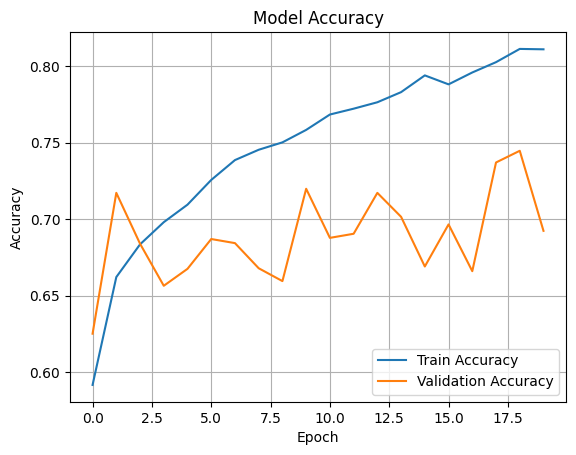

In [4]:
# neural network
import matplotlib.pyplot as plt

# Build the model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(y_train_cat.shape[1], activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and save the training history
history = model.fit(X_train, y_train_cat, epochs=20, batch_size=32, validation_data=(X_test, y_test_cat))

# Evaluation
test_loss, test_accuracy = model.evaluate(X_test, y_test_cat)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [5]:
category_mapping = dict(enumerate(train_data['activity'].astype('category').cat.categories))

# Display the mapping
print(category_mapping)

{0: 'Jumping', 1: 'Laying', 2: 'Sitting', 3: 'Standing'}


82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


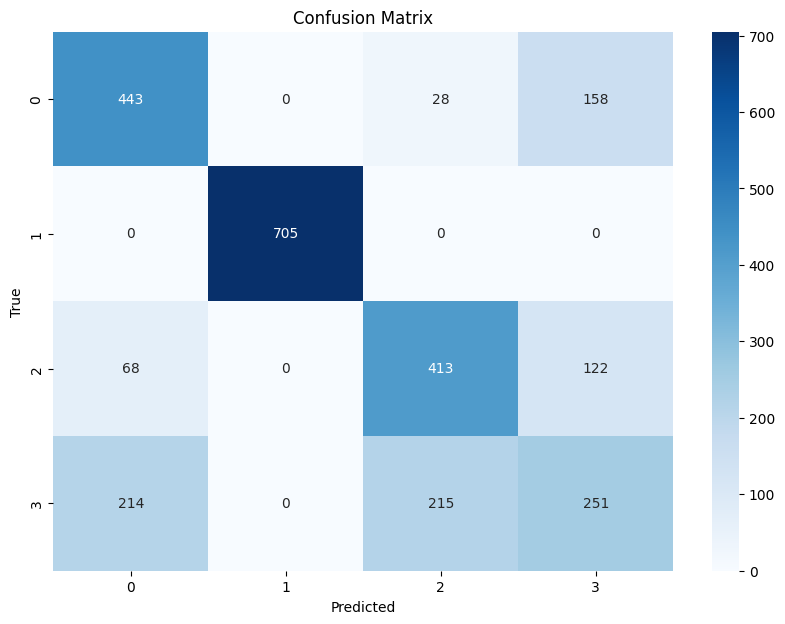

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get the class with the highest probability
y_true = np.argmax(y_test_cat, axis=1)  # Get the true class labels

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix using Seaborn heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [7]:
model.save_weights('/content/drive/MyDrive/P2/DATA/activity_model_weights.weights.h5')

print("Model weights saved successfully.")

Model weights saved successfully.
